In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

Data_w = pd.read_csv("weather_data.csv")
Data_p = pd.read_csv("price_demand_data.csv")

Data_w

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,6,N,2,1018.8,28.1,43,5,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,7,NW,17,1013.3,28.7,38,7,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,8,SW,4,1007.7,23.5,59,4,SW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,8,SE,11,1010.0,18.2,82,8,SW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,8,SE,13,1012.5,18.2,82,8,SE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,24/08/2021,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,7,SE,17,1021.5,11.7,55,6,S,17,1021.6
214,25/08/2021,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,3,SE,15,1023.3,13.4,59,6,SW,17,1021.8
215,28/08/2021,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,1,N,7,1018.6,17.4,31,3,NW,24,1013.5
216,29/08/2021,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,7,N,13,1011.4,12.8,84,7,S,6,1010.4


In [3]:
 #check the data types 
Data_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               218 non-null    object 
 1   Minimum temperature (°C)           218 non-null    float64
 2   Maximum temperature (°C)           218 non-null    float64
 3   Rainfall (mm)                      218 non-null    float64
 4   Evaporation (mm)                   218 non-null    float64
 5   Sunshine (hours)                   218 non-null    float64
 6   Direction of maximum wind gust     218 non-null    object 
 7   Speed of maximum wind gust (km/h)  218 non-null    int64  
 8   Time of maximum wind gust          218 non-null    object 
 9   9am Temperature (°C)               218 non-null    float64
 10  9am relative humidity (%)          218 non-null    int64  
 11  9am cloud amount (oktas)           218 non-null    int64  

In [4]:
# change the Date column into date time format
Data_w["Date"] = pd.to_datetime(Data_w["Date"])
Data_w["Date"]

0     2021-01-01
1     2021-02-01
2     2021-03-01
3     2021-04-01
4     2021-05-01
         ...    
213   2021-08-24
214   2021-08-25
215   2021-08-28
216   2021-08-29
217   2021-08-30
Name: Date, Length: 218, dtype: datetime64[ns]

In [5]:
# the date type has been changed to date time format, assign to original 
Data_w["Date"] = Data_w["Date"] = pd.to_datetime(Data_w["Date"])
Data_w["Date"]

0     2021-01-01
1     2021-02-01
2     2021-03-01
3     2021-04-01
4     2021-05-01
         ...    
213   2021-08-24
214   2021-08-25
215   2021-08-28
216   2021-08-29
217   2021-08-30
Name: Date, Length: 218, dtype: datetime64[ns]

In [6]:
# Load DataFrame table
Data_w

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,6,N,2,1018.8,28.1,43,5,E,13,1015.3
1,2021-02-01,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,7,NW,17,1013.3,28.7,38,7,SW,4,1008.5
2,2021-03-01,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,8,SW,4,1007.7,23.5,59,4,SW,2,1005.2
3,2021-04-01,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,8,SE,11,1010.0,18.2,82,8,SW,17,1011.0
4,2021-05-01,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,8,SE,13,1012.5,18.2,82,8,SE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,7,SE,17,1021.5,11.7,55,6,S,17,1021.6
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,3,SE,15,1023.3,13.4,59,6,SW,17,1021.8
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,1,N,7,1018.6,17.4,31,3,NW,24,1013.5
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,7,N,13,1011.4,12.8,84,7,S,6,1010.4


In [7]:
# Load Data Table
Data_p

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,1/01/2021 0:30,4179.21,LOW
1,VIC1,1/01/2021 1:00,4047.76,LOW
2,VIC1,1/01/2021 1:30,3934.70,LOW
3,VIC1,1/01/2021 2:00,3766.45,LOW
4,VIC1,1/01/2021 2:30,3590.37,LOW
...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM


In [8]:
# Check the data type in all the columns
Data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11664 entries, 0 to 11663
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REGION          11664 non-null  object 
 1   SETTLEMENTDATE  11664 non-null  object 
 2   TOTALDEMAND     11664 non-null  float64
 3   PRICECATEGORY   11664 non-null  object 
dtypes: float64(1), object(3)
memory usage: 364.6+ KB


In [9]:
# We need to extract the dates from date_time data from the settlement date column, for that we convert the column type to datetime format instead of object type
Data_p["Date"] = pd.to_datetime(Data_p["SETTLEMENTDATE"])
Data_p["Date"]

0       2021-01-01 00:30:00
1       2021-01-01 01:00:00
2       2021-01-01 01:30:00
3       2021-01-01 02:00:00
4       2021-01-01 02:30:00
                ...        
11659   2021-08-31 22:00:00
11660   2021-08-31 22:30:00
11661   2021-08-31 23:00:00
11662   2021-08-31 23:30:00
11663   2021-01-09 00:00:00
Name: Date, Length: 11664, dtype: datetime64[ns]

In [10]:
#from datetime import date
Data_p["Date"].dt.date


0        2021-01-01
1        2021-01-01
2        2021-01-01
3        2021-01-01
4        2021-01-01
            ...    
11659    2021-08-31
11660    2021-08-31
11661    2021-08-31
11662    2021-08-31
11663    2021-01-09
Name: Date, Length: 11664, dtype: object

In [11]:
# Assign it into the original Data table
Data_p["Date"] = Data_p["Date"].dt.date

In [12]:
Data_p

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01
...,...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,2021-08-31
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,2021-08-31
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,2021-08-31
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM,2021-08-31


In [13]:
# convert the date into datetime format
Data_p["Date"]= pd.to_datetime(Data_p["Date"])
Data_p["Date"]

0       2021-01-01
1       2021-01-01
2       2021-01-01
3       2021-01-01
4       2021-01-01
           ...    
11659   2021-08-31
11660   2021-08-31
11661   2021-08-31
11662   2021-08-31
11663   2021-01-09
Name: Date, Length: 11664, dtype: datetime64[ns]

In [14]:
# assign to original
Data_p["Date"]=Data_p["Date"]= pd.to_datetime(Data_p["Date"])
Data_p["Date"]

0       2021-01-01
1       2021-01-01
2       2021-01-01
3       2021-01-01
4       2021-01-01
           ...    
11659   2021-08-31
11660   2021-08-31
11661   2021-08-31
11662   2021-08-31
11663   2021-01-09
Name: Date, Length: 11664, dtype: datetime64[ns]

In [15]:
#Now make them as groups and find the median value_DataMining
Data_pg = Data_p.groupby("Date").max("TOTALDEMAND")
Data_pg

,TOTALDEMAND
Date,
2021-01-01,5019.64
2021-01-02,5228.29
2021-01-03,5225.37
2021-01-04,5807.02
2021-01-05,5261.09
...,...
2021-12-04,6415.58
2021-12-05,6406.00
2021-12-06,6062.58


In [16]:
Data_p["TOTALDEMAND"].describe()

count    11664.000000
mean      4925.798454
std        876.407490
min       2708.530000
25%       4255.500000
50%       4803.755000
75%       5477.337500
max       8196.830000
Name: TOTALDEMAND, dtype: float64

In [17]:
#The merged dataframe is assigned as MergeData
MergeData = Data_w.merge(Data_pg, how = 'inner', on = 'Date') 
MergeData

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),TOTALDEMAND
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,N,2,1018.8,28.1,43,5,E,13,1015.3,5019.64
1,2021-02-01,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,NW,17,1013.3,28.7,38,7,SW,4,1008.5,4964.35
2,2021-03-01,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,SW,4,1007.7,23.5,59,4,SW,2,1005.2,4503.31
3,2021-04-01,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,SE,11,1010.0,18.2,82,8,SW,17,1011.0,4764.18
4,2021-05-01,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,SE,13,1012.5,18.2,82,8,SE,19,1013.3,4800.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,SE,17,1021.5,11.7,55,6,S,17,1021.6,6717.65
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,SE,15,1023.3,13.4,59,6,SW,17,1021.8,6736.80
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,N,7,1018.6,17.4,31,3,NW,24,1013.5,5716.32
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,N,13,1011.4,12.8,84,7,S,6,1010.4,6227.89


In [18]:
# Renaming TOTALDEMAND to MAXDEMAND
MergeData.rename(columns = {'TOTALDEMAND':'MAXDEMAND'}, inplace = True)
display(MergeData.head())

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),MAXDEMAND
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,N,2,1018.8,28.1,43,5,E,13,1015.3,5019.64
1,2021-02-01,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,NW,17,1013.3,28.7,38,7,SW,4,1008.5,4964.35
2,2021-03-01,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,SW,4,1007.7,23.5,59,4,SW,2,1005.2,4503.31
3,2021-04-01,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,SE,11,1010.0,18.2,82,8,SW,17,1011.0,4764.18
4,2021-05-01,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,SE,13,1012.5,18.2,82,8,SE,19,1013.3,4800.64


In [19]:
#Make a MATRIX1
FEACHERS = (['MAXDEMAND','Minimum temperature (°C)','Maximum temperature (°C)','Rainfall (mm)',
            'Evaporation (mm)','Sunshine (hours)','Speed of maximum wind gust (km/h)',
            'Time of maximum wind gust','9am Temperature (°C)','9am relative humidity (%)'])
MergeData[FEACHERS].corr(method = 'pearson')

,MAXDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%)
MAXDEMAND,1.000000,-0.473554,-0.255099,-0.102213,-0.245547,-0.168017,0.110848,-0.359269,0.097664
Minimum temperature (°C),-0.473554,1.000000,0.701584,0.058010,0.650019,0.117211,0.002160,0.910744,-0.327113
Maximum temperature (°C),-0.255099,0.701584,1.000000,-0.122528,0.626420,0.489657,-0.088700,0.818239,-0.304566
Rainfall (mm),-0.102213,0.058010,-0.122528,1.000000,-0.067168,-0.118420,0.013371,-0.018478,0.190563
Evaporation (mm),-0.245547,0.650019,0.626420,-0.067168,1.000000,0.306203,0.115854,0.707067,-0.539895
Sunshine (hours),-0.168017,0.117211,0.489657,-0.118420,0.306203,1.000000,-0.034018,0.224974,-0.262985
Speed of maximum wind gust (km/h),0.110848,0.002160,-0.088700,0.013371,0.115854,-0.034018,1.000000,0.075885,-0.337354
9am Temperature (°C),-0.359269,0.910744,0.818239,-0.018478,0.707067,0.224974,0.075885,1.000000,-0.478083
9am relative humidity (%),0.097664,-0.327113,-0.304566,0.190563,-0.539895,-0.262985,-0.337354,-0.478083,1.000000


In [20]:
#Make a MATRIX2
FEACHERS = (['MAXDEMAND','9am cloud amount (oktas)','9am wind speed (km/h)','9am MSL pressure (hPa)',
             '3pm Temperature (°C)','3pm relative humidity (%)','3pm cloud amount (oktas)',
            '3pm wind speed (km/h)','3pm MSL pressure (hPa)'])
MergeData[FEACHERS].corr(method = 'pearson')

,MAXDEMAND,9am cloud amount (oktas),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind speed (km/h),3pm MSL pressure (hPa)
MAXDEMAND,1.000000,-0.156732,0.148167,0.044849,-0.282463,0.054049,0.084189,-0.019650,-0.018023
9am cloud amount (oktas),-0.156732,1.000000,-0.056089,-0.172483,-0.211235,0.452825,0.409234,-0.030351,-0.100721
9am wind speed (km/h),0.148167,-0.056089,1.000000,-0.214598,-0.112984,-0.161492,0.010879,0.371188,-0.231067
9am MSL pressure (hPa),0.044849,-0.172483,-0.214598,1.000000,-0.025741,-0.152818,-0.296555,-0.103746,0.960922
3pm Temperature (°C),-0.282463,-0.211235,-0.112984,-0.025741,1.000000,-0.571804,-0.280805,-0.027133,-0.121473
3pm relative humidity (%),0.054049,0.452825,-0.161492,-0.152818,-0.571804,1.000000,0.383701,-0.179711,-0.044552
3pm cloud amount (oktas),0.084189,0.409234,0.010879,-0.296555,-0.280805,0.383701,1.000000,-0.112564,-0.237224
3pm wind speed (km/h),-0.019650,-0.030351,0.371188,-0.103746,-0.027133,-0.179711,-0.112564,1.000000,-0.184127
3pm MSL pressure (hPa),-0.018023,-0.100721,-0.231067,0.960922,-0.121473,-0.044552,-0.237224,-0.184127,1.000000


Text(0.5, 1.0, 'Corrilation Map to explain the strength of relationship')

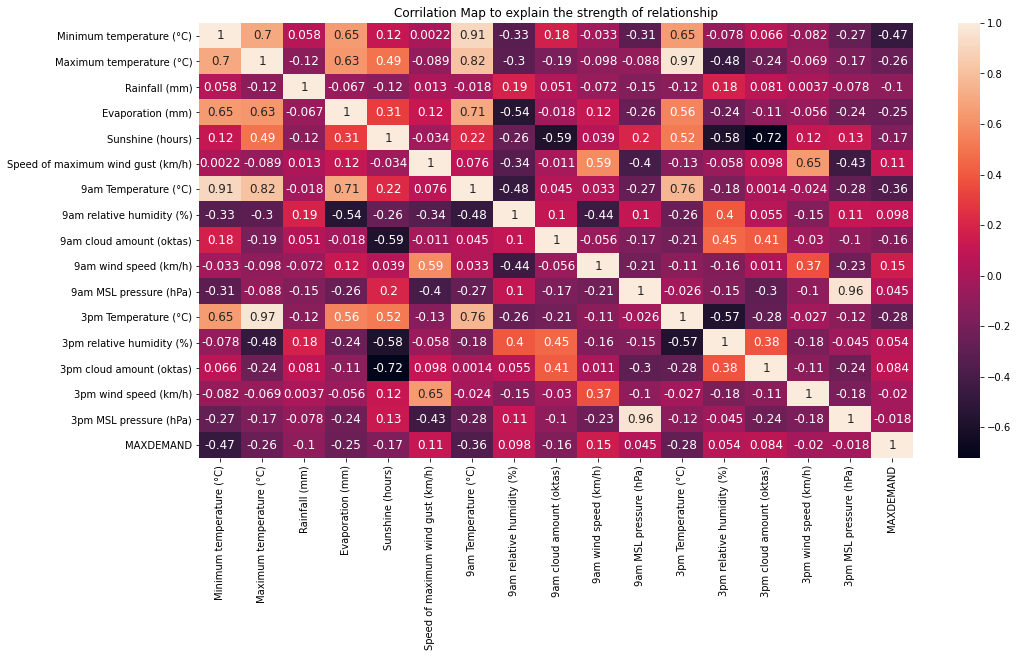

In [21]:
# Corrilarion values- Strong positive corrilations has light colour, negative corrilations has dark colour.
plt.figure(figsize=(16,8))
sns.heatmap(MergeData.corr(), annot = True, annot_kws={"size":12})

plt.title("Corrilation Map to explain the strength of relationship")
#sns.heatmap(MergeData, annot=True, fmt=".lf", linewidth=5, square=True, cmap='Blues_r')


<AxesSubplot:xlabel='Maximum temperature (°C)', ylabel='MAXDEMAND'>

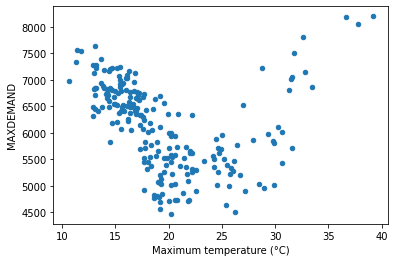

In [22]:
MergeData.plot.scatter (x = 'Maximum temperature (°C)',
                        y = 'MAXDEMAND')

In [23]:
#When the weather is extramly low or exreamly high, then the total demand increases, as people use the energy to maintain the temperature.

<AxesSubplot:xlabel='3pm Temperature (°C)', ylabel='MAXDEMAND'>

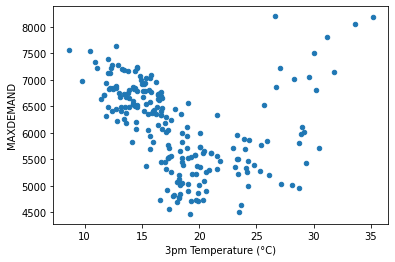

In [24]:
MergeData.plot.scatter (x = '3pm Temperature (°C)',
                        y = 'MAXDEMAND')


In [25]:
# 3 pm is the time that the temperature goes up in summer.Therefore this chart was plotted to give a random idea on energy demand.


<AxesSubplot:xlabel='Minimum temperature (°C)', ylabel='MAXDEMAND'>

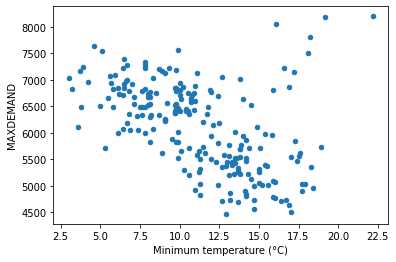

In [26]:
MergeData.plot.scatter (x = 'Minimum temperature (°C)',
                        y = 'MAXDEMAND')

In [27]:
Data_p

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01
...,...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,2021-08-31
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,2021-08-31
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,2021-08-31
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM,2021-08-31


In [28]:
Data_p.info()
#Data_p.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11664 entries, 0 to 11663
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   REGION          11664 non-null  object        
 1   SETTLEMENTDATE  11664 non-null  object        
 2   TOTALDEMAND     11664 non-null  float64       
 3   PRICECATEGORY   11664 non-null  object        
 4   Date            11664 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 455.8+ KB


In [29]:
def bin_rating(x):
    """
   Equal length descritisation.
    
        [min, 4080.605), [4080.605, 5452.68), [5452.68, 6824.755 ) [6824.755, max]
        
        min = 2708.53
        max = 8196.83

    
    """
    LOWER = 4080.605

    MID = 5452.68
    
    UPPER = 6824.755

    
    # [min, 4080.605)
    if x < LOWER:        
        return 1
    
    #  [4080.605, 5452.68)
    elif LOWER <= x < MID:
        return 2 
    
    #  [5452.68, 6824.755 ) 
   
    elif MID <= x < UPPER:
        return 3

   #[6824.755, max]
    return 4

# apply the function on the series
MergeData['bin_rating'] = MergeData['MAXDEMAND'].apply(bin_rating)

# also, print out the min/max for this feature
MergeData

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),MAXDEMAND,bin_rating
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,2,1018.8,28.1,43,5,E,13,1015.3,5019.64,2
1,2021-02-01,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,17,1013.3,28.7,38,7,SW,4,1008.5,4964.35,2
2,2021-03-01,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,4,1007.7,23.5,59,4,SW,2,1005.2,4503.31,2
3,2021-04-01,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,11,1010.0,18.2,82,8,SW,17,1011.0,4764.18,2
4,2021-05-01,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,13,1012.5,18.2,82,8,SE,19,1013.3,4800.64,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,17,1021.5,11.7,55,6,S,17,1021.6,6717.65,3
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,15,1023.3,13.4,59,6,SW,17,1021.8,6736.80,3
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,7,1018.6,17.4,31,3,NW,24,1013.5,5716.32,3
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,13,1011.4,12.8,84,7,S,6,1010.4,6227.89,3


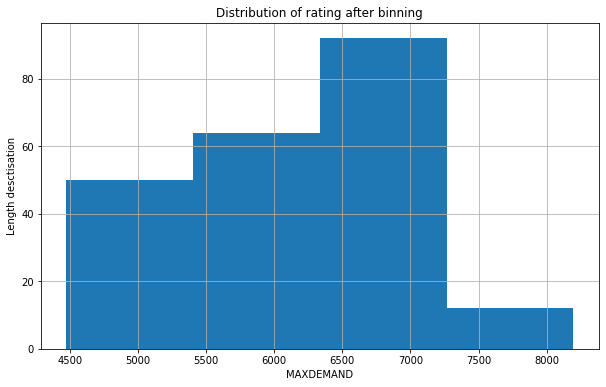

In [30]:
# Length Descretization
MergeData.MAXDEMAND.hist(bins = 4, figsize = (10,6))
plt.xlabel("MAXDEMAND")
plt.ylabel("Length desctisation")
plt.title('Distribution of rating after binning')


plt.show()

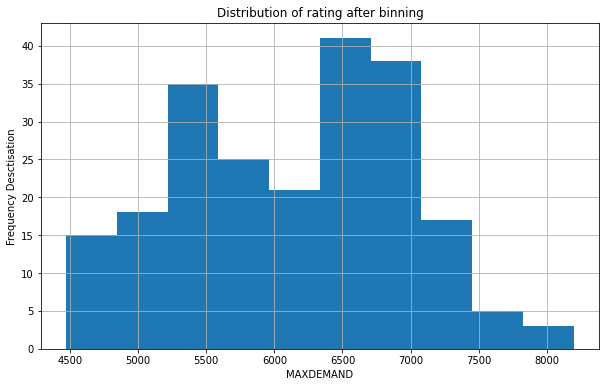

In [31]:
# Frequency Descretization
             
MergeData.MAXDEMAND.hist(bins = 10, figsize = (10,6))
plt.xlabel("MAXDEMAND")
plt.ylabel("Frequency Desctisation")
plt.title('Distribution of rating after binning')


plt.show()

In [ ]:
# This is a test comment